In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data1 =  "/content/gdrive/My Drive/final_project_dataset.pkl"

In [5]:
data_dict = pd.read_pickle(data1)

In [6]:
# For each person, how many features are available?
e_list = list(data_dict.values())[0]
e_list

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

In [7]:
#creating dataframe
Df = pd.DataFrame.from_dict(data_dict, orient='index')
Df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,94299,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,78552,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,NaN,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,34039,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


In [8]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     146 non-null    object
 1   to_messages                146 non-null    object
 2   deferral_payments          146 non-null    object
 3   total_payments             146 non-null    object
 4   loan_advances              146 non-null    object
 5   bonus                      146 non-null    object
 6   email_address              146 non-null    object
 7   restricted_stock_deferred  146 non-null    object
 8   deferred_income            146 non-null    object
 9   total_stock_value          146 non-null    object
 10  expenses                   146 non-null    object
 11  from_poi_to_this_person    146 non-null    object
 12  exercised_stock_options    146 non-null    object
 13  from_messages              146 non-null    object

In [ ]:
#total persons of interest
sum(Df['poi'])

In [10]:
#function to identify percentage of missing data
def missing_statistics(df):    
    statitics = pd.DataFrame(df.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = df.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

In [11]:
missing_statistics(Df)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,salary,0,146,0.0
1,to_messages,0,146,0.0
2,deferral_payments,0,146,0.0
3,total_payments,0,146,0.0
4,loan_advances,0,146,0.0
5,bonus,0,146,0.0
6,email_address,0,146,0.0
7,restricted_stock_deferred,0,146,0.0
8,deferred_income,0,146,0.0
9,total_stock_value,0,146,0.0


In [12]:
Df = Df.replace('NaN', np.nan)

In [13]:
missing_statistics(Df)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,salary,51,146,34.93
1,to_messages,60,146,41.10
2,deferral_payments,107,146,73.29
3,total_payments,21,146,14.38
4,loan_advances,142,146,97.26
5,bonus,64,146,43.84
6,email_address,35,146,23.97
7,restricted_stock_deferred,128,146,87.67
8,deferred_income,97,146,66.44
9,total_stock_value,20,146,13.70


In [14]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [15]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features


In [16]:
my_dataset = data_dict

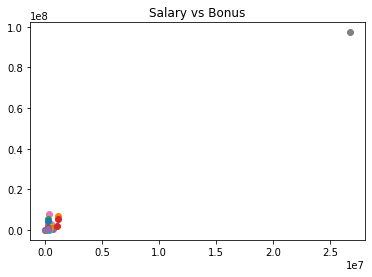

In [17]:
import seaborn as sns
%matplotlib inline

features = ['salary', 'bonus']
data = featureFormat(my_dataset, features)

for person in data:
    salary = person[0]
    bonus = person[1]
    plt.scatter(salary, bonus)
    plt.title('Salary vs Bonus')

In [18]:
outlier = max(data,key=lambda item:item[1])
print (outlier)

for person in my_dataset:
    if my_dataset[person]['salary'] == outlier[0] and my_dataset[person]['bonus'] == outlier[1]:
        print (person)

[26704229. 97343619.]
TOTAL


In [19]:
my_dataset.pop('TOTAL', 0) #remove outlier
data = featureFormat(my_dataset, features)

In [20]:
#Create New features
for person in my_dataset:
    if my_dataset[person]['from_poi_to_this_person'] != 'NaN' and my_dataset[person]['from_this_person_to_poi'] != 'NaN':
        my_dataset[person]['from_poi_ratio'] = my_dataset[person]['from_poi_to_this_person'] / my_dataset[person]['to_messages']
        my_dataset[person]['to_poi_ratio'] = my_dataset[person]['from_this_person_to_poi'] / my_dataset[person]['from_messages']
    else:
        my_dataset[person]['from_poi_ratio'] = 'NaN'
        my_dataset[person]['to_poi_ratio'] = 'NaN'

Text(0, 0.5, 'Fraction of emails sent to POIs')

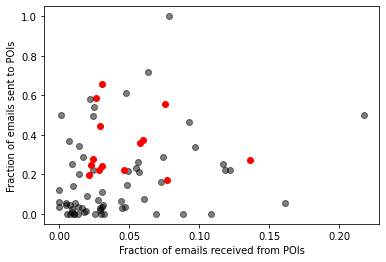

In [21]:
#POI vs NON-POI
features = ['poi', 'from_poi_ratio', 'to_poi_ratio']
data = featureFormat(my_dataset, features)

for person in data:
    x = person[1]
    y = person[2]
    if person[0] == 0:
        plt.scatter(x, y, color='black', alpha=0.5)
    else:
        plt.scatter(x, y, color='r')
        
plt.xlabel('Fraction of emails received from POIs')
plt.ylabel('Fraction of emails sent to POIs')

In [22]:
features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'total_payments', 'loan_advances', 
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                 'exercised_stock_options', 'long_term_incentive', 'restricted_stock', 'director_fees',
                 'shared_receipt_with_poi', 'from_poi_ratio', 'to_poi_ratio']

data = featureFormat(my_dataset, features_list)
y, x = targetFeatureSplit(data)

In [23]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
                                                                            
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
gnb_pred = clf.predict(X_test)
gnb_score = clf.score(X_test, y_test)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
print ('GaussianNB accuracy:', gnb_score)
print ('GaussianNB precision:', gnb_precision)
print ('GaussianNB recall:', gnb_recall, '\n')


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
fit = clf.fit(X_train, y_train)
dt_pred = clf.predict(X_test, y_test)
dt_score = clf.score(X_test, y_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
print ('Decision Tree accuracy:', dt_score)
print ('Decision Tree precision:', dt_precision)
print ('Decision Tree recall:', dt_recall, '\n')


from sklearn.svm import SVC
clf = SVC(random_state=0)
fit = clf.fit(X_train, y_train)
svc_pred = clf.predict(X_test)
svc_score = clf.score(X_test, y_test)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
print ('SVC accuracy:', svc_score)
print ('SVC precision:', svc_precision)
print ('SVC recall:', svc_recall, '\n')


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
fit = clf.fit(X_train, y_train)
rf_pred = clf.predict(X_test)
rf_score = clf.score(X_test, y_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print ('Random Forest accuracy:', rf_score)
print ('Random Forest precision:', rf_precision)
print ('Random Forest recall:', rf_recall, '\n')


GaussianNB accuracy: 0.22727272727272727
GaussianNB precision: 0.10810810810810811
GaussianNB recall: 0.8 

Decision Tree accuracy: 0.7045454545454546
Decision Tree precision: 0.21428571428571427
Decision Tree recall: 0.6 

SVC accuracy: 0.8863636363636364
SVC precision: 0.0
SVC recall: 0.0 

Random Forest accuracy: 0.9318181818181818
Random Forest precision: 0.75
Random Forest recall: 0.6 



In [24]:
#Feature Selection
#Selecting best features
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(f_classif, k=5)
features_selected = kbest.fit_transform(X_train, y_train)
print(features_selected.shape)

final_features = [features_list[i+1] for i in kbest.get_support(indices=True)]
print('Features selected by SelectKBest:')
print(final_features)

(100, 5)
Features selected by SelectKBest:
['bonus', 'total_stock_value', 'expenses', 'exercised_stock_options', 'to_poi_ratio']


In [27]:
#Using Best Features
features_select = ['poi', 'bonus', 'total_stock_value', 'expenses', 'exercised_stock_options', 'to_poi_ratio']
data = featureFormat(my_dataset, features_select)
y, x = targetFeatureSplit(data)
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, random_state=42)
                                                                           

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
gnb_pred = clf.predict(X_test)
gnb_score = clf.score(X_test, y_test)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
print ('GaussianNB accuracy:', gnb_score)
print ('GaussianNB precision:', gnb_precision)
print ('GaussianNB recall:', gnb_recall, '\n')


clf = DecisionTreeClassifier(random_state=0)
fit = clf.fit(X_train, y_train)
dt_pred = clf.predict(X_test, y_test)
dt_score = clf.score(X_test, y_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
print ('Decision Tree accuracy:', dt_score)
print ('Decision Tree precision:', dt_precision)
print ('Decision Tree recall:', dt_recall, '\n')


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
fit = clf.fit(X_train, y_train)
rf_pred = clf.predict(X_test)
rf_score = clf.score(X_test, y_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print ('Random Forest accuracy:', rf_score)
print ('Random Forest precision:', rf_precision)
print ('Random Forest recall:', rf_recall, '\n')

from sklearn.svm import SVC
clf = SVC(random_state=0)
fit = clf.fit(X_train, y_train)
svc_pred = clf.predict(X_test)
svc_score = clf.score(X_test, y_test)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
print ('SVC accuracy:', svc_score)
print ('SVC precision:', svc_precision)
print ('SVC recall:', svc_recall, '\n')

GaussianNB accuracy: 0.8571428571428571
GaussianNB precision: 0.6666666666666666
GaussianNB recall: 0.5 

Decision Tree accuracy: 0.8095238095238095
Decision Tree precision: 0.5
Decision Tree recall: 0.125 

Random Forest accuracy: 0.8095238095238095
Random Forest precision: 0.0
Random Forest recall: 0.0 

SVC accuracy: 0.8095238095238095
SVC precision: 0.0
SVC recall: 0.0 



In [26]:
#Reset feature list
#precision and recall are key metrics to be used
#Use SelectKBest to choose best features
features_list = ['poi', 'salary', 'bonus', 'deferral_payments', 'total_payments', 'loan_advances', 
                 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                 'exercised_stock_options', 'long_term_incentive', 'restricted_stock', 'director_fees',
                 'shared_receipt_with_poi', 'from_poi_ratio', 'to_poi_ratio']
data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)
                                                                            

In [28]:
PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

In [29]:
def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    from sklearn.model_selection import StratifiedShuffleSplit
    cv = StratifiedShuffleSplit(n_splits=folds, random_state=42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv.split(features, labels): 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print("Warning: Found a predicted label not == 0 or 1.")
                print("All predictions should take value 0 or 1.")
                print("Evaluating performance for processed predictions:")
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print(clf)
        print(PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5))
        print(RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives))
        print("")
    except:
        print("Got a divide by zero when trying out:", clf)
        print("Precision or recall may be undefined due to a lack of true positive predicitons.")

In [30]:
#Using Naive Bayes
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
select = SelectKBest()
gnb = GaussianNB()

steps = [('scaler', scaler),
         ('feature_select', select),
         ('classifier', gnb)]

param_grid = {'feature_select__k': range(1,17)}
sss = StratifiedShuffleSplit(100, test_size=0.3, random_state = 0)
pipe = Pipeline(steps)
gs = GridSearchCV(pipe, param_grid, cv=sss, scoring='f1')

gs.fit(X_train, y_train)
clf = gs.best_estimator_

test_classifier(clf, my_dataset, features_list)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('feature_select',
                 SelectKBest(k=5,
                             score_func=<function f_classif at 0x7fbcd7fe9e18>)),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
	Accuracy: 0.85153	Precision: 0.42928	Recall: 0.34450	F1: 0.38225	F2: 0.35867
	Total predictions: 15000	True positives:  689	False positives:  916	False negatives: 1311	True negatives: 12084



In [ ]:
pickle.dump(data_dict, open("mydataset.pkl", "wb") )
pickle.dump(gnb, open("myclassifier.pkl", "wb") )
pickle.dump(features_list, open(" myfeaturelist.pkl", "wb") )